In [163]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import os

In [164]:
os.getcwd
os.chdir("C:\\Users\\Home\Desktop\\DataTrained")

In [165]:
data=pd.read_csv('titanic_dataset.csv',sep=',',header=0, encoding="latin")

In [166]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### PROBLEM STATEMENT: TO PREDICT THE SURVIVAL OF THE PASSENGERS BOARDING ON TITANIC
### TARGET VARIABLE: Survived column using Logical regression method.

### EDA PROCESS

In [167]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
data.shape

(891, 12)

In [169]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### As we can observe total number of observations are 891 but we see some cuolumn has missing values like Age,Cabin,Embarked.
#### We are going to replace the missing values with median values.

In [170]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [171]:
import seaborn as sns

#### Analysis how the predictors depends on the response variable.

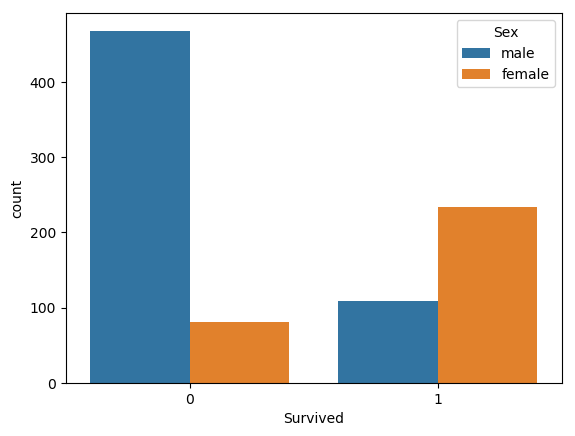

In [172]:
sns.countplot(x="Survived",hue="Sex", data=data)

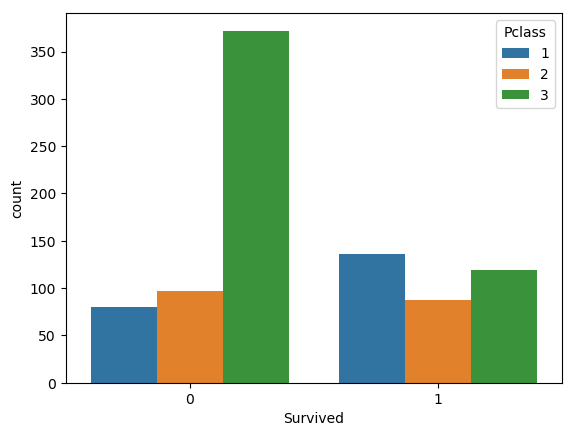

In [173]:
sns.countplot(x="Survived",hue="Pclass", data=data)

#### From the above observation it is shown that Female have survied passengers are more than male passengers
#### The passengers in the class 3 have less chance of surviving than other two classes



#### Checking number of null values

In [174]:
data.replace(0, np.NaN)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin have maximum valus as null so we can drop the column
#### Since Age is one of the important predictor we have to replace with median value
#### Since Embarked is categorical we can replace with value occured maximum times

#### To replace the NUll values with Median Age we have to calculate the Median age
#### According to Wikipedia, Median Age is the age that divides a population into two numerically equal groups - that is, half the people are younger than this age and half are older. It is a single index that summarizes the age distribution of a population.

In [175]:
Median_age=round((max(data["Age"])-min(data["Age"]))/2+min(data["Age"]))

In [176]:
print(Median_age)

40


#### So Above was method to find the Median Age and it came out to be 40 years.
#### Replacing Null value with age 40.

In [177]:
data["Age"].fillna(Median_age, inplace = True) 

In [178]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,40.0,0,0,330877,8.4583,NaN,Q


#### As we can see here that in before replacement 5th observation was having a Null value in age now it is replace with the Median age.

In [180]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

#### Since the maximum value is S in Embarked then we replace null values with S

In [181]:
value='S'
data["Embarked"].fillna(value, inplace = True) 

In [182]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [183]:
new_data=data.copy()

In [184]:
new_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
# Dropping Cabin column as it is having maximum Null values
new_data.drop(["Cabin"], axis=1, inplace = True) 

In [186]:
new_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#### Dropping some columns we do not nedd in this model

In [187]:
new_data.drop(["PassengerId","Name","Ticket"], axis=1, inplace = True) 

In [188]:
new_data.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,40.0,0,0,8.4583,Q


#### Combining columns with similar information to avoid miscolinearity problem

In [189]:
#Sibsp and Parch represent if the a person is traveling alone or with family
new_data['Traveling_Alone']=np.where((new_data["SibSp"]+new_data["Parch"])>0, 0, 1)
#Sibsp and Prach combines shows number of relative persion have
new_data['number_of_Relatives'] = new_data['SibSp'] + new_data['Parch']


In [190]:
new_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Traveling_Alone,number_of_Relatives
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0


#### Analysis of number of relatives vs survived using factor plot

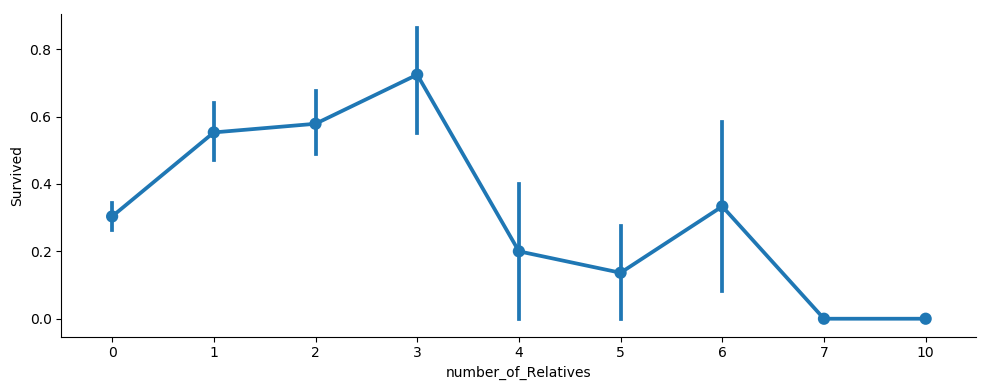

In [191]:
axix=sns.factorplot('number_of_Relatives','Survived', 
                      data=new_data, aspect = 2.5, )

#### As we can observe that more the number of relatives are on board better your chances of survival

In [192]:
#dropping Sibsp and Parch column
new_data.drop('SibSp', axis=1, inplace=True)
new_data.drop('Parch', axis=1, inplace=True)

In [193]:
new_data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Traveling_Alone,number_of_Relatives
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1


#### Transposing Pcalss into dummy variables

In [194]:
#Sex
sex = pd.get_dummies(new_data["Sex"],drop_first=True)

In [195]:
sex.head(2)

,male
0,1
1,0


In [196]:
#Embarked
embarked = pd.get_dummies(new_data["Embarked"],drop_first=True)

In [197]:
#Pclass
p_class=pd.get_dummies(new_data["Pclass"],drop_first=True)

In [198]:
new_data = pd.concat([new_data,p_class,sex,embarked],axis=1)

In [199]:
new_data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Traveling_Alone,number_of_Relatives,2,3,male,Q,S
0,0,3,male,22.0,7.2500,S,0,1,0,1,1,0,1
1,1,1,female,38.0,71.2833,C,0,1,0,0,0,0,0


In [200]:
new_data.drop(['Sex','Pclass','Embarked'],axis=1,inplace=True)

In [201]:
new_data.head(3)

,Survived,Age,Fare,Traveling_Alone,number_of_Relatives,2,3,male,Q,S
0,0,22.0,7.2500,0,1,0,1,1,0,1
1,1,38.0,71.2833,0,1,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1


#### Above is the final dataset we obtain after data manupulation

### Splitting into train and test datasets

In [202]:
import statsmodels.api as sm

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(new_data.drop('Survived', axis=1), new_data['Survived'],\
                                                    test_size=0.2, random_state=30)

In [205]:
X_train = sm.add_constant(X_train)

#### Applying logit function

In [206]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())

In [207]:
result = logit.fit()

In [208]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -308.31
Date:                Sun, 25 Aug 2019   Deviance:                       616.63
Time:                        20:58:42   Pearson chi2:                     713.
No. Iterations:                     5   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.4659      0.568      7.863      0.000       3.353       5.579
Age                    -0

In [209]:
#### Lets call for summary2 for detail summary statistics for AIC value
print(result.summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             636.6255  
Link Function:         logit             BIC:             -3994.1652
Dependent Variable:    Survived          Log-Likelihood:  -308.31   
Date:                  2019-08-25 20:58  LL-Null:         -473.03   
No. Observations:      712               Deviance:        616.63    
Df Model:              9                 Pearson chi2:    713.      
Df Residuals:          702               Scale:           1.0000    
Method:                IRLS                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                4.4659   0.5680   7.8631 0.0000  3.3528  5.5791
Age                 -0.0325   0.0084  -3.8633 0.0001 -0.0491 -0.0160
Fare                 0.0014   0.0025   0.5829 0.5600

#### Lets infer the intial anaysis from the above summary stats:

#### Constant beta value here can be interpreted as it represents the value of log odds being survived for the given predictors equals to its average value.
#### As for the beta coefficients say Age can be interpreted as with increase in age by a year,the log odds of number of passengers survived decreases by 0.0325.
#### Another beta coefficient Fare,with increase in fare by 1 unit,the log odds of passengers survived also increases by 0.0014
#### Likewise say with every new male recorded or increases,the log odds of number of passenger survived deceases by 2.69


#### Now we look at the p-vales. The p-values of fare,Embarked ports Q and S are higer than 0.05 which means that they are insignificant.
#### We have to eliminate these columns using Backwared Elimination method
#### But  practically is it feasible to eliminates these variables?
#### Embarked ports Q and S can be eliminated as it may not be related directly to chances of survival as survival does not practicaaly depend on which port the passengers have boarded on the ship.


#### In backward elimination method we first drop the hihest pvalue column i.e Q embarked

In [210]:
X_train.drop("Q", axis=1, inplace=True)

In [211]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             634.6296  
Link Function:         logit             BIC:             -4000.7292
Dependent Variable:    Survived          Log-Likelihood:  -308.31   
Date:                  2019-08-25 20:58  LL-Null:         -473.03   
No. Observations:      712               Deviance:        616.63    
Df Model:              8                 Pearson chi2:    713.      
Df Residuals:          703               Scale:           1.0000    
Method:                IRLS                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                4.4625   0.5653   7.8937 0.0000  3.3545  5.5705
Age                 -0.0326   0.0084  -3.9010 0.0001 -0.0490 -0.0162
Fare                 0.0015   0.0025   0.5867 0.5574

#### Here the AIC decreses than the previous model that means we are going in right direction 

#### Before eliminating Fare lets see if it has any relation with the class of travel
#### From the original dataset we observe that 1st class of travel is having highest cost then 2nd class and 3rd class being the least expensive, so if we drop fare column it will not affect the survival response as we have travel of class columns

In [212]:
X_train.drop("Fare", axis=1, inplace=True)

In [213]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             632.9883  
Link Function:         logit             BIC:             -4006.9385
Dependent Variable:    Survived          Log-Likelihood:  -308.49   
Date:                  2019-08-25 20:58  LL-Null:         -473.03   
No. Observations:      712               Deviance:        616.99    
Df Model:              7                 Pearson chi2:    716.      
Df Residuals:          704               Scale:           1.0000    
Method:                IRLS                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                4.6061   0.5131   8.9766 0.0000  3.6004  5.6118
Age                 -0.0330   0.0083  -3.9494 0.0001 -0.0493 -0.0166
Traveling_Alone     -0.7891   0.3107  -2.5399 0.0111

#### now we drop S embarked column next

In [214]:
X_train.drop("S", axis=1, inplace=True)

In [215]:
result = sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()

In [216]:
print(result.summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             635.8604  
Link Function:         logit             BIC:             -4008.6346
Dependent Variable:    Survived          Log-Likelihood:  -310.93   
Date:                  2019-08-25 20:58  LL-Null:         -473.03   
No. Observations:      712               Deviance:        621.86    
Df Model:              6                 Pearson chi2:    714.      
Df Residuals:          705               Scale:           1.0000    
Method:                IRLS                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                4.3815   0.4991   8.7785 0.0000  3.4032  5.3597
Age                 -0.0323   0.0083  -3.8822 0.0001 -0.0486 -0.0160
Traveling_Alone     -0.8738   0.3083  -2.8339 0.0046

#### As we can see the AIC decreases and so as deviance and all the predictors are significant so we can consider this model.


In [217]:
result.deviance

621.8603652063753

In [218]:
result.aic

635.8603652063753

### Evalution Matrix Application on the Model

In [235]:
from sklearn.linear_model import LogisticRegression

In [237]:
logit = LogisticRegression()

In [238]:
logit.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
predictions = logit.predict(X_test)

In [240]:
logit.score(X_test, Y_test)


0.7821229050279329

#### The accuracy score for the model is 78% for now

In [242]:
from sklearn.metrics import accuracy_score

In [243]:
accuracy_score(Y_test, predictions)

0.7821229050279329

#### Calculating log loss
#### We know that log loss increases if the predicted values will diverge from the actual values

In [244]:
from sklearn.metrics import log_loss

#### Predicting the predicted class

In [245]:
Y_test_encoded = Y_test.map(lambda x: 1 if x == 1 else 0)

In [246]:
predictions_encoded = np.where(predictions==1,1,0)

In [247]:
log_loss(Y_test_encoded, predictions_encoded)

7.5252752701841885

In [248]:
predictions[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [249]:
predictions_encoded[:5]

array([1, 1, 0, 1, 0])

#### Confusion Matrix


In [251]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [252]:
confusion_mat = confusion_matrix(Y_test, predictions)

In [253]:
confusion_mat = confusion_matrix(Y_test_encoded, predictions_encoded)

In [256]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

In [257]:
confusion_df

,Predicted 0,Predicted 1
Actual 0,93,15
Actual 1,24,47


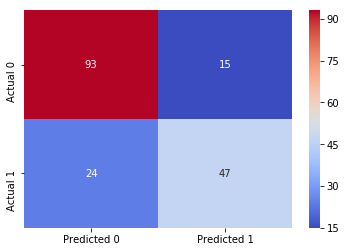

In [258]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

#### Here we observe that values which were predicted survived same as actual number of suvived passengers were 47 i.e True positive
#### Number of observation predicted not survived same as actual observations are 93 i.e True negatives
#### Actual concern which is to be reduced that is where the passenger has not survived but it is predicted as survived.


#### Calculating precision and recall scores

In [259]:
from sklearn.metrics import precision_score, recall_score

In [260]:
precision_score(Y_test_encoded, predictions_encoded)

0.7580645161290323

In [261]:
recall_score(Y_test_encoded, predictions_encoded)

0.6619718309859155

#### Calculating F1 scores

In [262]:
from sklearn.metrics import f1_score

In [263]:
f1_score(Y_test_encoded, predictions_encoded)

0.706766917293233

#### ROC Curve and calculating optimal cut off value

In [264]:
from sklearn.metrics import roc_curve, roc_auc_score

In [265]:
probs = logit.predict_proba(X_test)[::,1]

In [266]:
auc = roc_auc_score(Y_test_encoded, probs)
print(auc)

0.8404407929055816


In [267]:
fpr, tpr, threshold = roc_curve(Y_test_encoded, probs)

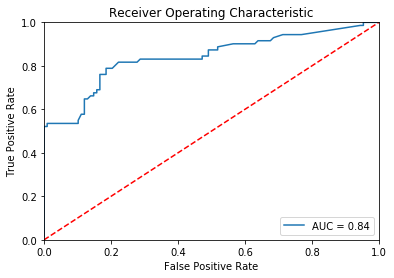

In [271]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [272]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [273]:
optimal_threshold

0.37435342488677503

#### From above ROC curve we get a cut-off value as 0.374
#### Lets update our prediction model using this cut-off value.

In [274]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [275]:
new_confusion_mat = confusion_matrix(Y_test_encoded, new_predictions)

In [278]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

In [279]:
new_confusion_df

,Predicted 0,Predicted 1
Actual 0,88,20
Actual 1,17,54


In [280]:
accuracy_score(Y_test_encoded, new_predictions)

0.7932960893854749

In [281]:
log_loss(Y_test_encoded, new_predictions)

7.139389489163683

### Conclusion

#### From updating the model with the optimal cut-off value we get 79% accuracy of the model compared to 78% with 0.5 default cut-off
#### The log loss decreased which shows that the predicted values approched actual value a little.
#### Updated confusion matrix shows how the true positive value increased.
#### Thus from this model we can predict with 79% accuracy how many passenger survived.

##### P.S :- The model accuracy can be  increased further if we balanced the 0s and 1s in reponse variable in training data 